File: Wildlife-Population-Harvest.ipynb  
Name: Corinne Medeiros  
Date: 11/16/19  
Usage: Program reads data from wildlife population and harvest data for Forest Service 2010 RPA assessment. Endangered and threatened status across species is analyzed through visualizations, analytical distribution models, hypothesis tests, and correlation tests.

# Wildlife Population and Harvest Data

This dataset comes from the U.S. Department of Agriculture’s website, provided by the Forest Service Research & Development (FS R&D) on wildlife population and harvest data. It includes data captured from 1955 until 2010. The data extend across a range of assessment areas, including the Pacific Coast, Rocky Mountain, North, and South. For this project I'm focusing on groups of endangered and threatened species including mammals, birds, reptiles, and amphibians, with some initial exploration of harvest data by region.

**Data Source:**

Wildlife population and harvest data for Forest Service 2010 RPA Assessment <https://doi.org/10.2737/RDS-2014-0009>

**Hypothesis:**

My hypothesis explores the relationship between time and endangered or threatened status, as well as relationships between specific groups of species and all species together.

In [1]:
from __future__ import print_function, division

import thinkstats2

import thinkplot

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import scipy.stats

import numpy as np

## All Endangered or Threatened Species

Figure 22 from this data contains the cumulative number of species listed as threatened or endangered from 1 Jul 1976 through 27 October 2010 for all taxa, plants, animals, vertebrate groups (amphibians, birds, fish, mammals, reptiles), and invertebrate groups (arachnids, crustaceans, insects, and molluscs). 

I will be focusing on animals from the vertebrate groups.

### Importing Data

In [2]:
# Importing csv file - all species status, converting 'date' column to datetime, setting column as index
endangered_df = pd.read_csv("RDS-2014-0009/Data/Figure_22.csv",
                                    parse_dates=['date'],
                                    index_col=['date'])

In [3]:
# Previewing data
endangered_df.head()

,all_m,all_b,all_r,all_am,all_f,all_s,all_cl,all_cr,all_i,all_ar,...,end_cr,thrt_cr,end_i,thrt_i,end_ar,thrt_ar,end_p,thrt_p,end_all,thrt_all
date,,,,,,,,,,,,,,,,,,,,,
1976-07-01,36,66,8,4,34,NaN,22,NaN,8,NaN,...,NaN,NaN,6,2,NaN,NaN,NaN,NaN,170,8
1976-09-01,36,66,8,4,34,NaN,22,NaN,8,NaN,...,NaN,NaN,6,2,NaN,NaN,NaN,NaN,170,8
1976-10-01,36,66,8,4,34,NaN,22,NaN,8,NaN,...,NaN,NaN,6,2,NaN,NaN,NaN,NaN,170,8
1976-11-01,36,66,8,4,34,NaN,22,NaN,8,NaN,...,NaN,NaN,6,2,NaN,NaN,NaN,NaN,170,8
1976-12-31,37,67,9,4,34,NaN,22,NaN,8,NaN,...,NaN,NaN,6,2,NaN,NaN,NaN,NaN,172,9


### Cleaning Data

In [4]:
# Confirming 'date' column is in datetime format
print(endangered_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 230 entries, 1976-07-01 to 2010-10-27
Data columns (total 37 columns):
all_m       230 non-null int64
all_b       230 non-null int64
all_r       230 non-null int64
all_am      230 non-null int64
all_f       230 non-null int64
all_s       207 non-null float64
all_cl      230 non-null int64
all_cr      211 non-null float64
all_i       230 non-null int64
all_ar      99 non-null float64
all_p       218 non-null float64
all_ani     230 non-null int64
all_all     230 non-null int64
end_m       230 non-null int64
thrt_m      230 non-null int64
end_b       230 non-null int64
thrt_b      230 non-null int64
end_r       230 non-null int64
thrt_r      226 non-null float64
end_am      230 non-null int64
thrt_am     225 non-null float64
end_f       230 non-null int64
thrt_f      230 non-null int64
end_s       207 non-null float64
thrt_s      207 non-null float64
end_cl      230 non-null int64
thrt_cl     184 non-null float64
end_cr      211 non-nu

In [5]:
# Checking date index values
endangered_df.index

DatetimeIndex(['1976-07-01', '1976-09-01', '1976-10-01', '1976-11-01',
               '1976-12-31', '1977-01-31', '1977-02-28', '1977-03-30',
               '1977-04-30', '1977-06-06',
               ...
               '2008-03-19', '2008-05-13', '2008-08-13', '2008-11-28',
               '2009-02-23', '2009-04-03', '2009-08-25', '2009-10-02',
               '2010-06-01', '2010-10-27'],
              dtype='datetime64[ns]', name='date', length=230, freq=None)

In [6]:
# Checking for null values
endangered_df.isnull().sum()

all_m         0
all_b         0
all_r         0
all_am        0
all_f         0
all_s        23
all_cl        0
all_cr       19
all_i         0
all_ar      131
all_p        12
all_ani       0
all_all       0
end_m         0
thrt_m        0
end_b         0
thrt_b        0
end_r         0
thrt_r        4
end_am        0
thrt_am       5
end_f         0
thrt_f        0
end_s        23
thrt_s       23
end_cl        0
thrt_cl      46
end_cr       19
thrt_cr      46
end_i         0
thrt_i        0
end_ar      131
thrt_ar     131
end_p        12
thrt_p       20
end_all       0
thrt_all      0
dtype: int64

### Visualizing Data

#### Endangerment and Threatened Status of All Species over time

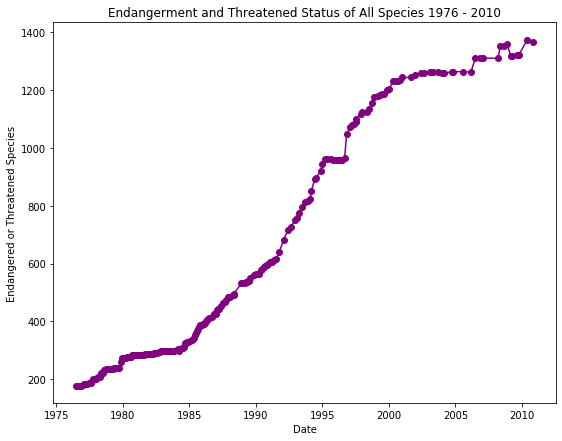

In [7]:
# Creating the plot space
fig, ax = plt.subplots(figsize=(9, 7))

# Adding x-axis and y-axis
ax.plot(endangered_df.index.values,
        endangered_df['all_all'], '-o',
        color='purple')

# Setting title and labels for axes
ax.set(xlabel="Date",
       ylabel="Endangered or Threatened Species",
       title="Endangerment and Threatened Status of All Species 1976 - 2010")

# Cleaning up x-axis dates
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.show()

#### Endangerment and Threatened Status of All Mammals over time

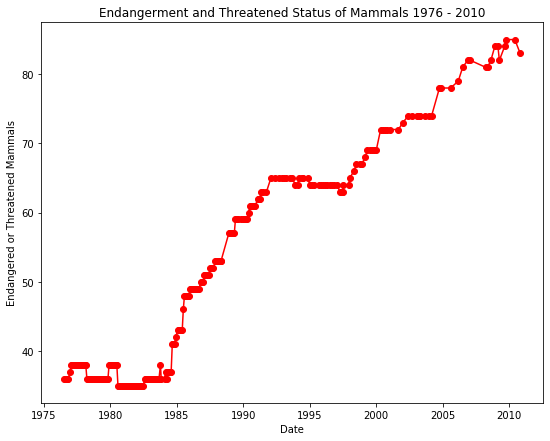

In [8]:
# Creating plot space for plotting the data
fig, ax = plt.subplots(figsize=(9, 7))

# Adding x-axis and the y-axis to plot
ax.plot(endangered_df.index.values,
        endangered_df['all_m'], '-o',
        color='red')

# Setting title and labels for axes
ax.set(xlabel="Date",
       ylabel="Endangered or Threatened Mammals",
       title="Endangerment and Threatened Status of Mammals 1976 - 2010")

# Cleaning up x axis dates
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.show()

## Species by Region - Initial Exploration

Although I ultimately decided to focus on the data from Figure 22, I was interested in exploring some of the region-specific files to get a sense of trends and possibilities for analysis alongside the main data file.

In [9]:
# Importing region specific csv files

north_df = pd.read_csv("RDS-2014-0009/Data/Figure_16_North.csv")

pacific_coast_df = pd.read_csv("RDS-2014-0009/Data/Figure_16_Pacific_Coast.csv")

rocky_mt_df = pd.read_csv("RDS-2014-0009/Data/Figure_16_Rocky_Mountain.csv")

south_df = pd.read_csv("RDS-2014-0009/Data/Figure_16_South.csv")

us_df = pd.read_csv("RDS-2014-0009/Data/Figure_16_US.csv")

In [10]:
# Previewing pacific coast data
pacific_coast_df.head()

,year,arctic_fox_sum,badger_sum,bassarisk_sum,beaver_sum,bobcat_sum,cougar_sum,coyote_sum,fisher_sum,fox_gray_sum,...,opossum_sum,otter_sum,raccoon_sum,skunk_hooded_sum,skunk_hognosed_sum,skunk_striped_sum,squirrel_sum,weasel_sum,wolverine_sum,all_species_sum
0,1970,2600,109,0,16121,1845,0,2213,0,450,...,684,2057,3470,0,0,1133,0,782,0,162801
1,1971,1650,146,0,21655,2525,0,3019,0,315,...,776,2862,4232,0,0,1051,0,674,548,189716
2,1972,1790,204,0,29454,2596,0,4769,0,703,...,1037,3458,5952,0,0,967,0,1858,946,229238
3,1973,2340,442,0,29494,3976,0,9484,0,1328,...,2216,3473,9751,0,0,3260,0,2672,1037,278957
4,1974,755,486,0,28501,3686,0,11951,0,1231,...,2106,3104,11175,0,0,2310,0,1152,805,269475


In [11]:
# Printing column names
pacific_coast_df.columns

Index(['year', 'arctic_fox_sum', 'badger_sum', 'bassarisk_sum', 'beaver_sum',
       'bobcat_sum', 'cougar_sum', 'coyote_sum', 'fisher_sum', 'fox_gray_sum',
       'fox_kit_sum', 'fox_red_sum', 'fox_swift_sum', 'gray_wolf_sum',
       'lynx_sum', 'marten_sum', 'mink_sum', 'muskrat_sum', 'nutria_sum',
       'opossum_sum', 'otter_sum', 'raccoon_sum', 'skunk_hooded_sum',
       'skunk_hognosed_sum', 'skunk_striped_sum', 'squirrel_sum', 'weasel_sum',
       'wolverine_sum', 'all_species_sum'],
      dtype='object')

In [12]:
# Checking for null values - pacific coast region
pacific_coast_df.isnull().sum()

year                  0
arctic_fox_sum        0
badger_sum            0
bassarisk_sum         0
beaver_sum            0
bobcat_sum            0
cougar_sum            0
coyote_sum            0
fisher_sum            0
fox_gray_sum          0
fox_kit_sum           0
fox_red_sum           0
fox_swift_sum         0
gray_wolf_sum         0
lynx_sum              0
marten_sum            0
mink_sum              0
muskrat_sum           0
nutria_sum            0
opossum_sum           0
otter_sum             0
raccoon_sum           0
skunk_hooded_sum      0
skunk_hognosed_sum    0
skunk_striped_sum     0
squirrel_sum          0
weasel_sum            0
wolverine_sum         0
all_species_sum       0
dtype: int64

### Visualizing Pacific Coast Region Data

Scatter plot representing the Red Fox harvest sum in comparison to the harvest sum of all species from the Pacific Coast region.

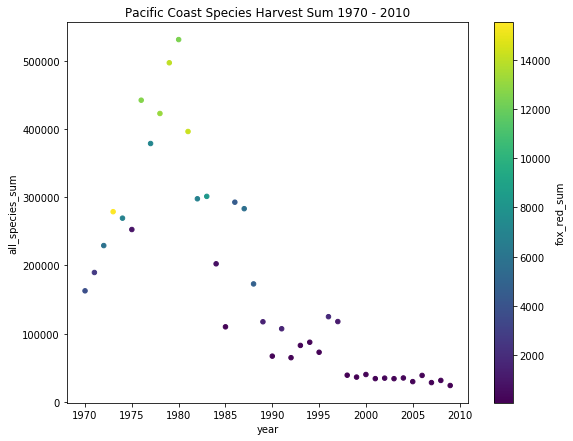

In [13]:
# Plotting 'all species sum' over the years - Pacific Coast
fig, ax = plt.subplots()
pacific_coast_df.plot(kind='scatter',
                      x='year', 
                      y='all_species_sum', 
                      c='fox_red_sum', 
                      colormap='viridis', 
                      ax=ax,
                      figsize=(9, 7))
plt.title('Pacific Coast Species Harvest Sum 1970 - 2010')
plt.show()

### Visualizing South Region Data

Scatter plot representing the Red Fox harvest sum in comparison to the harvest sum of all species from the South region.

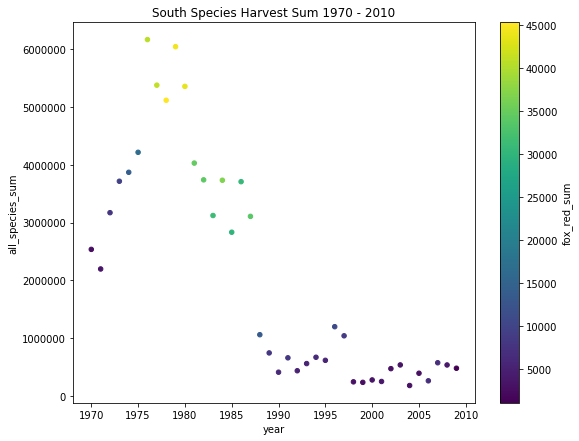

In [14]:
# Plotting 'all species sum' over the years - south
fig, ax = plt.subplots()
south_df.plot(kind='scatter',
                      x='year', 
                      y='all_species_sum', 
                      c='fox_red_sum', 
                      colormap='viridis', 
                      ax=ax,
                      figsize=(9, 7))
plt.title('South Species Harvest Sum 1970 - 2010')
plt.show()

I realized that the specific region data would be difficult to combine with the main dataset because besides the year, all of the variables are completely different. So I realized it would be best to stick with the main dataset from Figure 22.

## Endangered or Threatened Species

### Histograms of Variables

#### All Species

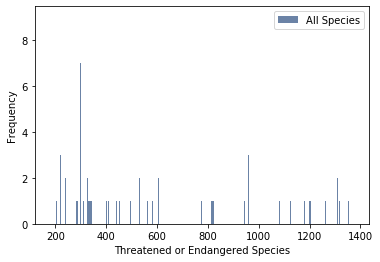

<Figure size 576x432 with 0 Axes>

In [15]:
# Plotting histogram of 'all species' variable
hist_all_all = thinkstats2.Hist(endangered_df.all_all, label='All Species')
thinkplot.Hist(hist_all_all)
thinkplot.Show(xlabel='Threatened or Endangered Species', ylabel='Frequency')

In [16]:
# Descriptive statistics - all species
print('Mean:', endangered_df.all_all.mean())
print('Mode:', endangered_df.all_all.mode().values)
print('Variance:', endangered_df.all_all.var())
print('Standard Deviation:', endangered_df.all_all.std())

Mean: 592.3478260869565
Mode: [284]
Variance: 151995.38940573382
Standard Deviation: 389.86586078513443


#### All Mammals

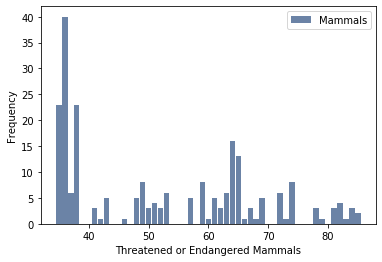

<Figure size 576x432 with 0 Axes>

In [17]:
# Plotting histogram of 'all mammals' variable
hist_all_m = thinkstats2.Hist(endangered_df.all_m, label='Mammals')
thinkplot.Hist(hist_all_m)
thinkplot.Show(xlabel='Threatened or Endangered Mammals', ylabel='Frequency')

In [18]:
# Descriptive statistics - all mammals
print('Mean:', endangered_df.all_m.mean())
print('Mode:', endangered_df.all_m.mode().values)
print('Variance:', endangered_df.all_m.var())
print('Standard Deviation:', endangered_df.all_m.std())

Mean: 51.947826086956525
Mode: [36]
Variance: 238.9142965635086
Standard Deviation: 15.45685273797705


#### All Birds

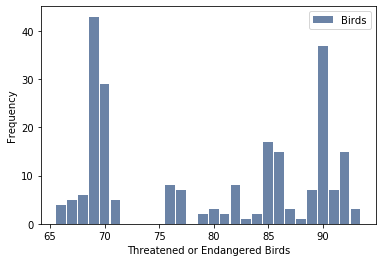

<Figure size 576x432 with 0 Axes>

In [19]:
# Plotting histogram of 'all birds' variable
hist_all_b = thinkstats2.Hist(endangered_df.all_b, label='Birds')
thinkplot.Hist(hist_all_b)
thinkplot.Show(xlabel='Threatened or Endangered Birds', ylabel='Frequency')

In [20]:
# Descriptive statistics - all birds
print('Mean:', endangered_df.all_b.mean())
print('Mode:', endangered_df.all_b.mode().values)
print('Variance:', endangered_df.all_b.var())
print('Standard Deviation:', endangered_df.all_b.std())

Mean: 79.59130434782608
Mode: [69]
Variance: 88.15538257072342
Standard Deviation: 9.389109785848891


#### All Reptiles

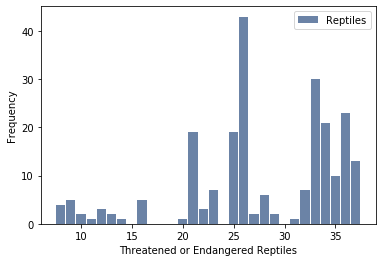

<Figure size 576x432 with 0 Axes>

In [21]:
# Plotting histogram of 'all reptiles' variable
hist_all_r = thinkstats2.Hist(endangered_df.all_r, label='Reptiles')
thinkplot.Hist(hist_all_r)
thinkplot.Show(xlabel='Threatened or Endangered Reptiles', ylabel='Frequency')

In [22]:
# Descriptive statistics - all reptiles
print('Mean:', endangered_df.all_r.mean())
print('Mode:', endangered_df.all_r.mode().values)
print('Variance:', endangered_df.all_r.var())
print('Standard Deviation:', endangered_df.all_r.std())

Mean: 27.830434782608695
Mode: [26]
Variance: 55.61741029048798
Standard Deviation: 7.457708112449024


#### All Amphibians

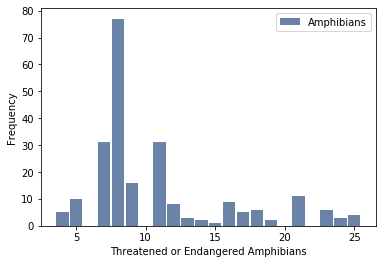

<Figure size 576x432 with 0 Axes>

In [23]:
# Plotting histogram of 'all amphibians' variable
hist_all_am = thinkstats2.Hist(endangered_df.all_am, label='Amphibians')
thinkplot.Hist(hist_all_am)
thinkplot.Show(xlabel='Threatened or Endangered Amphibians', ylabel='Frequency')

In [24]:
# Descriptive statistics - all amphibians
print('Mean:', endangered_df.all_am.mean())
print('Mode:', endangered_df.all_am.mode().values)
print('Variance:', endangered_df.all_am.var())
print('Standard Deviation:', endangered_df.all_am.std())

Mean: 10.791304347826086
Mode: [8]
Variance: 26.130928422251763
Standard Deviation: 5.111841979389793


### Outliers

#### All Species

In [25]:
# Smallest values for all species
for all_all, freq in hist_all_all.Smallest(10):
    print(all_all, freq)

178 4
181 1
183 4
185 2
186 1
194 1
199 2
202 2
204 1
206 1


In [26]:
# Largest values for all species
for all_all, freq in hist_all_all.Largest(10):
    print(all_all, freq)

1375 1
1368 1
1358 1
1353 1
1352 1
1321 1
1320 1
1318 1
1317 1
1311 2


#### All Mammals

In [27]:
# Smallest values for all mammals
for all_m, freq in hist_all_m.Smallest(10):
    print(all_m, freq)

35 23
36 40
37 6
38 23
41 3
42 1
43 5
46 1
48 5
49 8


In [28]:
# Largest values for all mammals
for all_m, freq in hist_all_m.Largest(10):
    print(all_m, freq)

85 2
84 3
83 1
82 4
81 3
79 1
78 3
74 8
73 1
72 6


#### All Birds

In [29]:
# Smallest values for all birds
for all_b, freq in hist_all_b.Smallest(10):
    print(all_b, freq)

66 4
67 5
68 6
69 43
70 29
71 5
76 8
77 7
79 2
80 3


In [30]:
# Largest values for all birds
for all_b, freq in hist_all_b.Largest(10):
    print(all_b, freq)

93 3
92 15
91 7
90 37
89 7
88 1
87 3
86 15
85 17
84 2


#### All Reptiles

In [31]:
# Smallest values for all reptiles
for all_r, freq in hist_all_r.Smallest(10):
    print(all_r, freq)

8 4
9 5
10 2
11 1
12 3
13 2
14 1
16 5
20 1
21 19


In [32]:
# Largest values for all reptiles
for all_r, freq in hist_all_r.Largest(10):
    print(all_r, freq)

37 13
36 23
35 10
34 21
33 30
32 7
31 1
29 2
28 6
27 2


#### All Amphibians

In [33]:
# Smallest values for all amphibians
for all_am, freq in hist_all_am.Smallest(10):
    print(all_am, freq)

4 5
5 10
7 31
8 77
9 16
11 31
12 8
13 3
14 2
15 1


In [34]:
# Largest values for all amphibians
for all_am, freq in hist_all_am.Largest(10):
    print(all_am, freq)

25 4
24 3
23 6
21 11
19 2
18 6
17 5
16 9
15 1
14 2


The largest and smallest values for these variables are reasonable in this context, so there's no need to remove any outliers.

### Probability Mass Function (PMF)  

I will be using the PMF to get probabilities of the possible values for all mammals threatened or endangered during the early years (1976 – 1980) and compare this to other years.

In [35]:
# Creating subsets of all mammals variable for early years (1976 - 1980) and all other years

mask1 = (endangered_df.index > '1976-07-01') & (endangered_df.index <= '1980-12-31')
mask2 = (endangered_df.index > '1980-12-31')

all_m_low = endangered_df.loc[mask1]
all_m_rest = endangered_df.loc[mask2]

In [36]:
# Previewing low subset
all_m_low.head()

,all_m,all_b,all_r,all_am,all_f,all_s,all_cl,all_cr,all_i,all_ar,...,end_cr,thrt_cr,end_i,thrt_i,end_ar,thrt_ar,end_p,thrt_p,end_all,thrt_all
date,,,,,,,,,,,,,,,,,,,,,
1976-09-01,36,66,8,4,34,NaN,22,NaN,8,NaN,...,NaN,NaN,6,2,NaN,NaN,NaN,NaN,170,8
1976-10-01,36,66,8,4,34,NaN,22,NaN,8,NaN,...,NaN,NaN,6,2,NaN,NaN,NaN,NaN,170,8
1976-11-01,36,66,8,4,34,NaN,22,NaN,8,NaN,...,NaN,NaN,6,2,NaN,NaN,NaN,NaN,170,8
1976-12-31,37,67,9,4,34,NaN,22,NaN,8,NaN,...,NaN,NaN,6,2,NaN,NaN,NaN,NaN,172,9
1977-01-31,38,67,9,5,34,NaN,22,NaN,8,NaN,...,NaN,NaN,6,2,NaN,NaN,NaN,NaN,172,11


In [37]:
# Creating PMF objects

low_pmf = thinkstats2.Pmf(all_m_low.all_m, label='all_m (1976-1980)')

rest_pmf = thinkstats2.Pmf(all_m_rest.all_m, label='all_m (1980+)')

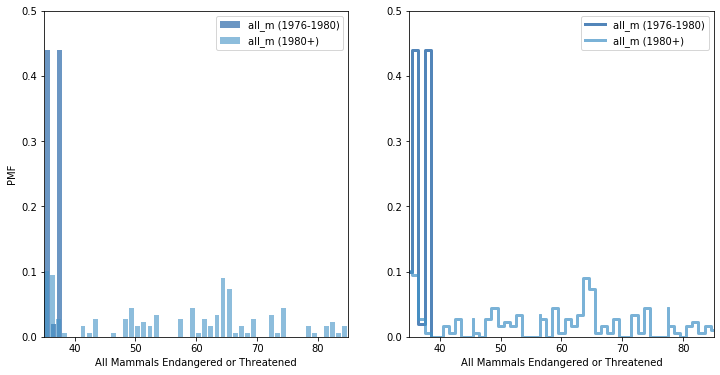

In [38]:
# Plotting PMFs

width=0.8
axis = [35, 85, 0, 0.5]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(low_pmf, align='right', width=width)
thinkplot.Hist(rest_pmf, align='left', width=width)
thinkplot.Config(xlabel='All Mammals Endangered or Threatened', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([low_pmf, rest_pmf])
thinkplot.Config(xlabel='All Mammals Endangered or Threatened', axis=axis)

This PMF compares all mammals threatened or endangered during the early years (1976 – 1980) to other years as both a bar graph and a step function.

There is a much higher probability of seeing values below 40 during the early years (1976 - 1980) versus all other years.

### Cumulative Distribution Function (CDF)

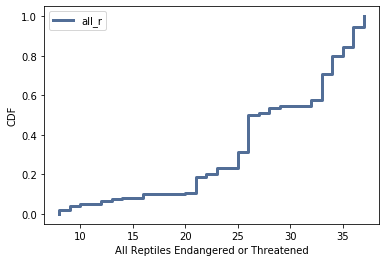

In [39]:
# Plotting CDF of all reptiles variable
all_r_cdf = thinkstats2.Cdf(endangered_df.all_r, label='all_r')
thinkplot.Cdf(all_r_cdf)
thinkplot.Config(xlabel='All Reptiles Endangered or Threatened', ylabel='CDF', loc='upper left')

Over the years, less than 10% of the assessments were below 10 reptiles endangered or threatened, the most common number was 26, and the highest values, in the mid 30s, are higher than or equal to about 80% of the assessments. 

This graph can tell us how a specific reading for reptiles falls within the range of readings for all reptiles.

### Analytical Distribution

#### Normal Distribution

Mean: 79.59130434782608
Var: 87.77209829867674
Sigma: 9.368676443269708


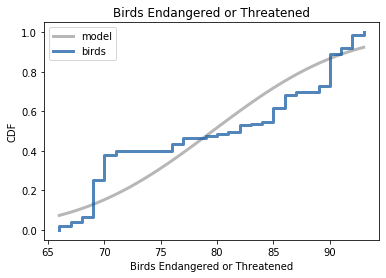

In [40]:
birds = endangered_df.all_b

# Estimating parameters
mu, var = thinkstats2.MeanVar(birds)
print('Mean:', mu)
print('Var:', var)
    
# Plotting the model
sigma = np.sqrt(var)
print('Sigma:', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=66, high=93)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# Plotting the data
cdf = thinkstats2.Cdf(birds, label='birds')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Birds Endangered or Threatened',
                 xlabel='Birds Endangered or Threatened',
                 ylabel='CDF')

The curves in the all birds data deviate from the normal curve of the expected model. 
The majority of the lower numbers are between the 10th and 30th percentile rank while the most common higher value of 90 is in the 70th and 90th percentile rank.

#### Normal Probability Plot

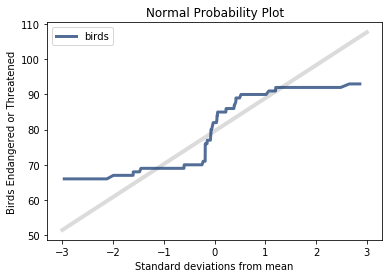

In [42]:
mean, var = thinkstats2.MeanVar(birds)
std = np.sqrt(var)

xs = [-3, 3]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(birds)
thinkplot.Plot(xs, ys, label='birds')

thinkplot.Config(title='Normal Probability Plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Birds Endangered or Threatened')

The Normal Probability Plot confirms a lack of normality, with the tails deviating substantially from the model, and overall not a very straight line.

### Scatterplots

#### All Species Endangered or Threatened over the years

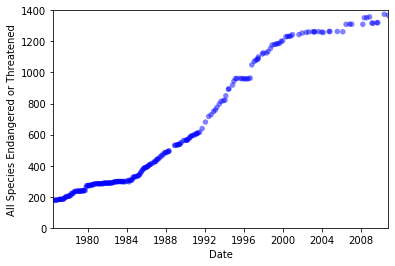

<Figure size 576x432 with 0 Axes>

In [43]:
thinkplot.Scatter(endangered_df.index, endangered_df.all_all, alpha=0.5)
thinkplot.Config(xlabel='Date',
                 ylabel='All Species Endangered or Threatened',
                 axis=[endangered_df.index[0], endangered_df.index[-1], 0, 1400],
                 legend=False)

thinkplot.show()

#### Amphibians vs. Reptiles Endangered or Threatened

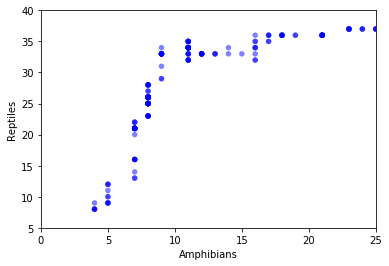

<Figure size 576x432 with 0 Axes>

In [44]:
thinkplot.Scatter(endangered_df.all_am, endangered_df.all_r, alpha=0.5)
thinkplot.Config(xlabel='Amphibians',
                 ylabel='Reptiles',
                 axis=[0, 25, 5, 40],
                 legend=False)

thinkplot.show()

The scatter plots suggest strong positive correlation between the status of amphibians and reptiles, and also between dates and all species.

#### Covariance

In [48]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [49]:
# Creating new column for date index values
endangered_df['date_values'] = endangered_df.index.values

dates = endangered_df.date_values

# Converting date column to integer
dates_int = dates.dt.strftime("%Y%m%d").astype(int)

# Dates vs. All Species - Covariance
Cov(dates_int, endangered_df.all_all)

34182461.20378072

In [50]:
# Amphibians vs. Reptiles - Covariance
Cov(endangered_df.all_am, endangered_df.all_r)

28.955916824196603

The results indicate a positive relationship in both cases, but the units are not standardized, so correlation would be a better option.

#### Pearson's Correlation

In [51]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [52]:
# Dates vs. All Species
Corr(dates_int, endangered_df.all_all)

0.9769299662487161

In [53]:
# Amphibians vs. Reptiles
Corr(endangered_df.all_am, endangered_df.all_r)

0.762863563861494

It appears that there is a strong positive correlation between dates and all species' status, and the status of amphibians and reptiles, but since Pearson's correlation might underestimate the strength of non-linear relationships, I'll try Spearman's correlation as well.

#### Spearman's Correlation

In [54]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [55]:
# Amphibians vs. Reptiles
SpearmanCorr(endangered_df.all_am, endangered_df.all_r)

0.9616245457853707

In [56]:
# Dates vs. All Species
SpearmanCorr(dates_int, endangered_df.all_all)

0.9994848649303559

Spearman's correlation calculations confirm the strong positive relationship in both cases. As an alternative, I'll also try converting the variables to make them closer to linear.

#### Adjusting for Non-Linear Relationships

In [57]:
# Amphibians vs. Reptiles - Converting both variables
Corr(np.log(endangered_df.all_am), np.log(endangered_df.all_r))

0.8013109722949451

In [58]:
# Amphibians vs. Reptiles - Converting one variable
Corr(endangered_df.all_am, np.log(endangered_df.all_r))

0.6664016320960809

In [59]:
# Dates vs. All Species - Converting both variables
Corr(np.log(dates_int), np.log(endangered_df.all_all))

0.9754341294652453

Even when converting both or one of the variables, there is still a strong correlation in all scenarios.

### Hypothesis Testing

#### Testing Correlation between Birds and Mammals

My null hypothesis is that there is no correlation between the endangered or threatened status of birds and mammals.

In [60]:
class CorrelationPermute(thinkstats2.HypothesisTest):
    """Tests correlations by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: tuple of xs and ys
        """
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [61]:
# Creating a subset of dataset for birds and mammals variables
cleaned = endangered_df.dropna(subset=['all_b', 'all_m'])
corr_data = cleaned.all_b, cleaned.all_m

# Running correlation test on data subset
corr_test = CorrelationPermute(corr_data)
pvalue = corr_test.PValue()

print ('pvalue: ', pvalue)

pvalue:  0.0


After 1000 iterations per HypothesisTest, the pvalue is 0, which tells us that there wasn't a correlation more significant than the null hypothesis. The pvalue proves that there is very little probability that we'd find a strong correlation within any given sample, so we can only conclude that the correlation between the endangered status of birds and mammals is probably not 0.

In comparing the actual correlation to the highest value from the iterations, we can get an idea of how unexpected the observed value is under the null hypothesis.

In [62]:
print ('Correlation (actual):', corr_test.actual)
print ('Correlation (highest value from simulations):', corr_test.MaxTestStat())

Correlation (actual): 0.9494558371356719
Correlation (highest value from simulations): 0.18330406949619452


### Regression Analysis

In [63]:
import statsmodels.formula.api as smf

In [64]:
# Simple Linear Regression of all mammals as a function of all species

formula = 'all_m ~ all_all'
model = smf.ols(formula, data=endangered_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  all_m   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     2091.
Date:                Sat, 16 Nov 2019   Prob (F-statistic):          7.85e-117
Time:                        11:25:13   Log-Likelihood:                -688.84
No. Observations:                 230   AIC:                             1382.
Df Residuals:                     228   BIC:                             1389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.6473      0.583     50.820      0.000      28.498      30.797
all_all        0.0376      0.001     45.733      0.000       0.036       0.039
==============================================================================
Omnibus:                       41.088   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.338
Skew:                           0.442   Prob(JB):                     0.000283
Kurtosis:                       2.039   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# Extracting parameters
inter = results.params['Intercept']
slope = results.params['all_all']
print('Intercept:', inter)
print('Slope:', slope)

Intercept: 29.647347603485965
Slope: 0.03764760753962294


In [66]:
# Extracting p-value of slope estimate
slope_pvalue = results.pvalues['all_all']
print('p-value of slope estimate:', slope_pvalue)

p-value of slope estimate: 7.849550924033314e-117


In [67]:
# Extracting coefficent of determination
print('R^2:', results.rsquared)

R^2: 0.9017020163033321


Overall, with high R^2 values, the regression results support strong correlation and predictive power, with the status of all species significantly accounting for variation in the status of all mammals. However, there is the problem of multicollinearity, because these variables are highly correlated, which takes away from the statistical significance of the all species variable.